In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

In [2]:
import sys 
sys.path

['C:\\Users\\Eesh Gupta\\Documents\\RU Research\\Chakram\\Multimode-Conditional-Displacements\\hpc_runs\\multimode_circle_grape\\varying_alpha_chi_time_qubitamp',
 'C:\\Users\\Eesh Gupta\\anaconda\\python38.zip',
 'C:\\Users\\Eesh Gupta\\anaconda\\DLLs',
 'C:\\Users\\Eesh Gupta\\anaconda\\lib',
 'C:\\Users\\Eesh Gupta\\anaconda',
 '',
 'C:\\Users\\Eesh Gupta\\anaconda\\lib\\site-packages',
 'c:\\users\\eesh gupta\\documents\\ru research\\chakram\\qoc',
 'c:\\users\\eesh gupta\\documents\\ru research\\chakram\\quantum-optimal-control',
 'C:\\Users\\Eesh Gupta\\anaconda\\lib\\site-packages\\locket-0.2.1-py3.8.egg',
 'C:\\Users\\Eesh Gupta\\anaconda\\lib\\site-packages\\win32',
 'C:\\Users\\Eesh Gupta\\anaconda\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\Eesh Gupta\\anaconda\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\Eesh Gupta\\anaconda\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\Eesh Gupta\\.ipython']

In [3]:
filename = "dataset_sweep_alpha_qubitamp_time.csv"
df_grape = pd.read_csv(filename)
df_grape

,time,steps,chi,alpha,qubit_amp,detuning,err
0,500,50,-66,5,0.010,-0.01,0.014623
1,1000,50,-66,5,0.010,-0.01,-1.000000
2,500,50,-66,5,0.001,-0.01,0.796845
3,1000,50,-66,5,0.001,-0.01,-1.000000
4,500,50,-66,10,0.010,-0.01,0.033962
5,1000,50,-66,10,0.010,-0.01,-1.000000
6,500,50,-66,10,0.001,-0.01,0.425445
7,1000,50,-66,10,0.001,-0.01,-1.000000


In [4]:
# filename = r"C:\Users\Eesh Gupta\Documents\RU Research\Chakram\Multimode-Conditional-Displacements\hpc_runs\single_mode_ecd\Varying Time Lengths\pulse_times_g01_g10_Oct21"
# df_ecd = pd.read_csv(filename)
# df_ecd

In [35]:
import matplotlib
font = {'family' : 'normal',
        'weight' : 'light',
        'size'   : 15}

matplotlib.rc('font', **font)

In [5]:
#y = list(df_ecd['rep fid'])

In [21]:
def get_small_df(df, time, chi):
    '''
    Input: dataframe and specific time and chi
    output: all alpha, qubit amp values with the specified time, chi
    '''
    df = df.loc[df_grape['time'] == time]
    df = df.loc[df_grape['chi'] == chi] 
    df = df.loc[df_grape['err'] != -1] #ignore Nan values
    #smaller_df.reset_index()
    alphas = list(df['alpha'])
    qubit_amps = list(df['qubit_amp'])
    errs = list(df['qubit_amp'])
    return alphas, qubit_amps, errs

In [19]:
small_df = df_grape.loc[df_grape['time'] == 1000]
smaller_df = small_df.loc[df_grape['chi'] == -66] 
smallerr_df = smaller_df.loc[df_grape['err'] != -1]
#smaller_df.reset_index()
smallerr_df

,time,steps,chi,alpha,qubit_amp,detuning,err


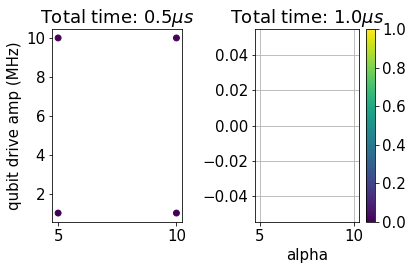

In [43]:
times = [500, 1000]
fig, axs = plt.subplots(1, len(times), sharex=True)
cm = plt.cm.get_cmap('viridis')

for i, time in enumerate(times): 
    
    x,y,z = get_small_df(df = df_grape, time = time, chi = -66)
    y = [1e+3 *k for k in y]
    im = axs[i].scatter(x, y, c=z, vmin=0, vmax=1, s=35, cmap=cm)
    axs[i].set_title('Total time: ' + str(time/1000) + r'$ \mu s$')

fig.subplots_adjust(right=0.8)
#cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, '')#, cax=cbar_ax)

plt.xlabel('alpha') #intermediate oscillator displacement
plt.grid()
axs[0].set_ylabel('qubit drive amp (MHz)')
fig.tight_layout()
plt.show()

In [14]:
alphas = list(smaller_df['alpha'])
alphas

[5, 5, 10, 10]

/tmp/ipykernel_232251/4248836624.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(list(df_grape['time']), list(df_grape['rep fid']), 'k', marker = 'o', color = 'orange', label ='Circle Grape')


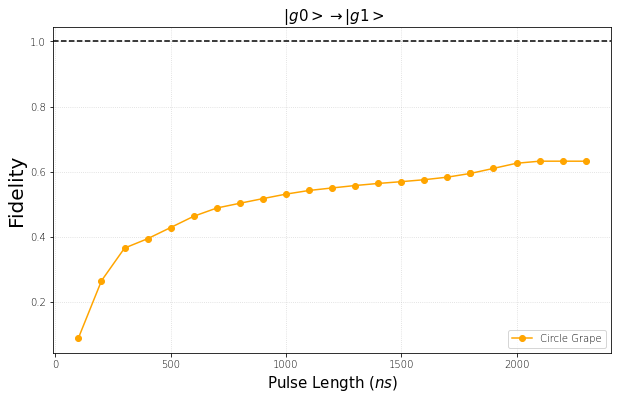

In [21]:
#plt.plot(times, mean_buckets)
fig = plt.figure(figsize = (10, 6))
#plt.errorbar(x, y, yerr = err, ecolor='black', capsize=10)#, label ='Line4')

plt.plot(list(df_grape['time']), list(df_grape[' fid']), 'k', marker = 'o', color = 'orange', label ='Circle Grape')
#plt.plot(list(df_ecd['time']), list(df_ecd['rep fid']), 'k', marker = 'o', color = 'blue', label ='ECD')
#plt.fill_between(x, y-err, y+err, alpha = 0.2)


plt.grid(alpha=0.5, linestyle=':')
plt.axhline(y=1, color='black', linestyle='--')
plt.xlabel('Pulse Length ($ns$)', fontsize = 15)
#plt.hline(ecd_only)
plt.ylabel('Fidelity', fontsize = 20)
plt.title(r' $|g0> \rightarrow |g1>$', fontsize = 15)
#fig.savefig('Ancilla Relaxation')
plt.legend()